- adapt the code for pretrained nets to work with Resnet50

# Load libraries

In [1]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras import backend as K

# image processing
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import img_to_array

# pretrained nets
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

Using TensorFlow backend.


In [3]:
# modified from
# https://thispointer.com/python-how-to-get-list-of-files-in-directory-and-sub-directories/
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = [item for item in os.listdir(dirName) if not item.startswith('.')]
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
            
    allFiles = [each for each in allFiles if each.endswith((".jpg", ".jpeg", ".png"))]           
    return allFiles

In [4]:
img_height, img_width = 100, 100

train_image_files_path = "/keras2production/fruits/Training/"
valid_image_files_path = "/keras2production/fruits/Test/"

train_images = getListOfFiles(train_image_files_path)

# Keras

https://keras.io/

## Pretrained nets

https://keras.io/applications/

### Use Resnet50

https://keras.io/applications/#usage-examples-for-image-classification-models

In [5]:
model_resnet = ResNet50(weights="imagenet")

In [6]:
model_resnet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [7]:
def classify_image(image):
    img = cv2.imread(image)        
    b,g,r = cv2.split(img)       # get b,g,r
    img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    # images need to be numpy arrays of 224 x 224 color images with 3 channels
    image = image_utils.load_img(image, target_size=(224, 224))
    image = image_utils.img_to_array(image)

    # expand the dimensions to be (1, 3, 224, 224)
    image = np.expand_dims(image, axis=0)

    # scale pixels between -1 and 1, sample-wise
    image = preprocess_input(image)
        
    preds = model_resnet.predict(image)
    res = decode_predictions(preds, top=3)
    
    for (i, (imagenetID, label, prob)) in enumerate(res[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

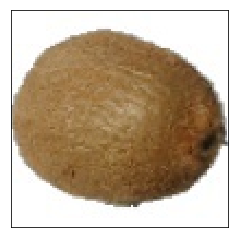

1. electric_ray: 43.63%
2. gong: 11.39%
3. maraca: 9.85%


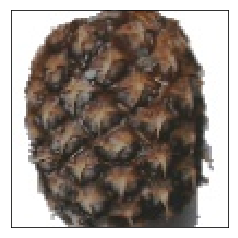

1. hen-of-the-woods: 43.49%
2. chiton: 17.40%
3. honeycomb: 13.85%


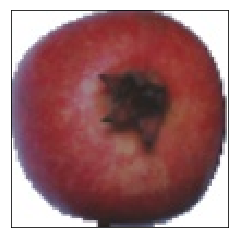

1. pomegranate: 73.59%
2. strawberry: 18.14%
3. hip: 2.27%


In [8]:
for i in [10, 1010, 2010]:
    classify_image(train_images[i])